<a href="https://colab.research.google.com/github/DarshikaKhandelwal/wattwise.github.io/blob/master/electricity_consumption_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import skew, kurtosis, shapiro

In [45]:
df = pd.read_csv("/content/psp-peak.csv")
df.head()

,Month,Peak Demand,Temperature
0,Jan-22,7164,13.7
1,Feb-22,7208,17.8
2,Mar-22,7792,26.8
3,Apr-22,9320,32.4
4,May-22,10052,33.6


In [46]:
df.set_index('Month', inplace = True)

In [47]:
df.index

Index(['Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22', 'Jul-22',
       'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23',
       'Mar-23', 'Apr-23', 'May-23', 'Jun-23', 'Jul-23'],
      dtype='object', name='Month')

In [48]:
df = df.rename(columns={'Peak Demand': 'Peak_Demand'})

In [49]:
df.index = pd.to_datetime(df.index, format='%b-%y')

In [50]:
df.index = pd.to_datetime(df.index.strftime('%m-%Y'))

<Axes: xlabel='Month'>

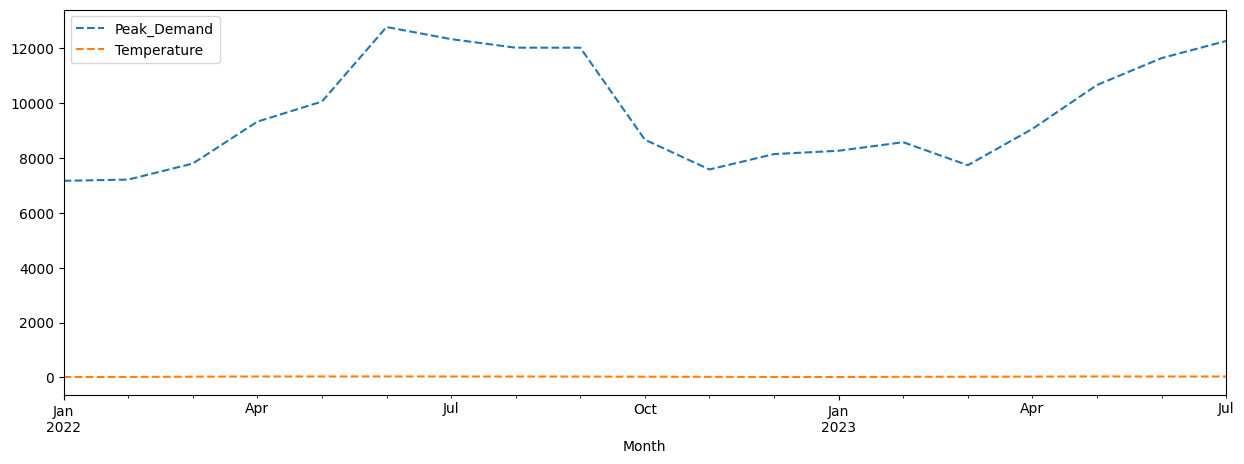

In [51]:
df.plot(style = "--", figsize = (15, 5))

###Train test Split


In [54]:
cutoff_date = pd.to_datetime('09-01-2022')

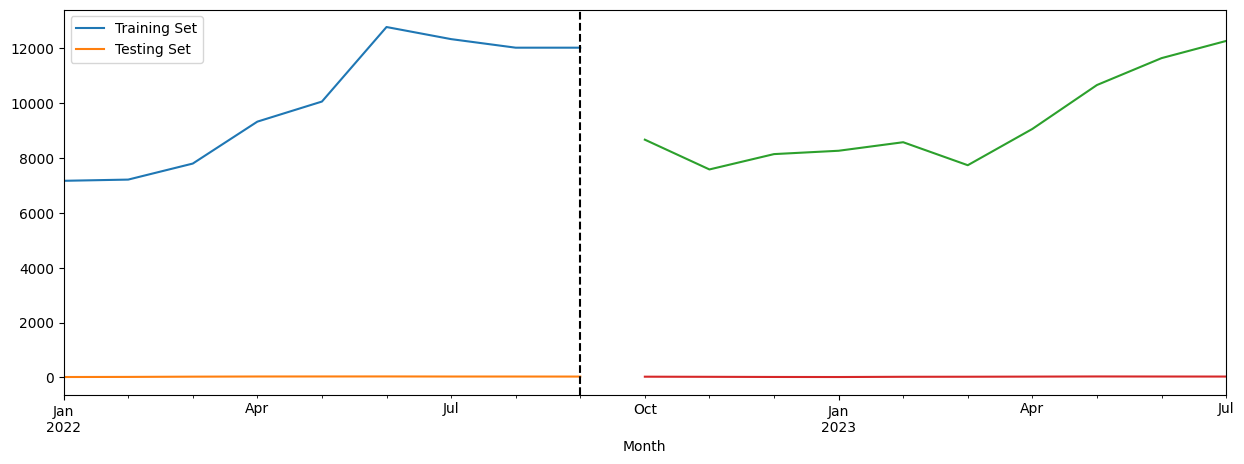

In [56]:
train = df.loc[df.index <= cutoff_date]
test = df.loc[df.index > '09-2022']

fig, ax = plt.subplots(figsize = (15, 5))
train.plot(ax = ax)
test.plot(ax = ax)
ax.axvline('09-2022', color = 'black', ls = '--')
ax.legend(['Training Set', 'Testing Set'])
plt.show()

In [57]:
def create_features(df):
  df = df.copy()
  df['month'] = df.index.month
  df['year'] = df.index.year
  return df

In [58]:
df = create_features(df)

In [59]:
df.head()

,Peak_Demand,Temperature,month,year
Month,,,,
2022-01-01,7164,13.7,1,2022
2022-02-01,7208,17.8,2,2022
2022-03-01,7792,26.8,3,2022
2022-04-01,9320,32.4,4,2022
2022-05-01,10052,33.6,5,2022


In [60]:
df.columns

Index(['Peak_Demand', 'Temperature', 'month', 'year'], dtype='object')

In [79]:
train = create_features(train)
test = create_features(test)

X = df[['month', 'year', 'Temperature']]  # Feature matrix
y = df['Peak_Demand']
FEATURES = ['month', 'year', 'Temperature']
TARGET = 'Peak_Demand'

In [80]:
X_train = train[FEATURES]
X_test = test[FEATURES]

y_train = train[TARGET]
y_test = test[TARGET]

In [81]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
model = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.01)
model.fit(X_train, y_train,
           eval_set=[(X_train, y_train),(X_test, y_test)],
           verbose = True)

[0]	validation_0-rmse:2152.19542	validation_1-rmse:1772.99971
[1]	validation_0-rmse:2135.87468	validation_1-rmse:1768.70595
[2]	validation_0-rmse:2119.68260	validation_1-rmse:1764.58647
[3]	validation_0-rmse:2103.61747	validation_1-rmse:1760.63846
[4]	validation_0-rmse:2087.67926	validation_1-rmse:1756.85959
[5]	validation_0-rmse:2071.86632	validation_1-rmse:1753.24706
[6]	validation_0-rmse:2056.17779	validation_1-rmse:1749.79837
[7]	validation_0-rmse:2040.61190	validation_1-rmse:1746.51068
[8]	validation_0-rmse:2025.16872	validation_1-rmse:1743.38162
[9]	validation_0-rmse:2009.84740	validation_1-rmse:1740.40864
[10]	validation_0-rmse:1994.64658	validation_1-rmse:1737.58879
[11]	validation_0-rmse:1979.56544	validation_1-rmse:1734.91990
[12]	validation_0-rmse:1964.60324	validation_1-rmse:1732.39900
[13]	validation_0-rmse:1949.75897	validation_1-rmse:1730.02396
[14]	validation_0-rmse:1935.03141	validation_1-rmse:1727.79186
[15]	validation_0-rmse:1920.42013	validation_1-rmse:1725.69998
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [82]:
test['prediction'] = model.predict(X_test)

In [83]:
df = df.merge(test)

In [84]:
df.columns

Index(['Peak_Demand', 'Temperature', 'month', 'year', 'prediction'], dtype='object')

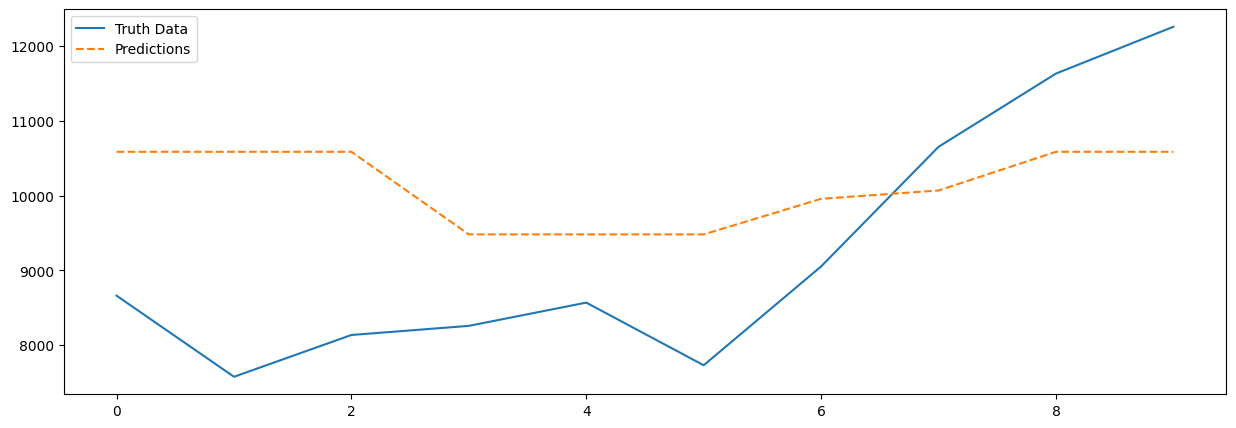

In [85]:
ax = df[['Peak_Demand']].plot(figsize = (15,5))
df['prediction'].plot(ax = ax, style = '--')
plt.legend(['Truth Data', 'Predictions'])
plt.show()

In [103]:
y_pred = model.predict(X_test)

In [104]:
type(y_pred)

numpy.ndarray

In [105]:
y_test_array = np.array(y_test)

In [106]:
type(y_test_array)

numpy.ndarray

10

In [72]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_array, y_pred)
print(f'R-squared: {r2}')

R-squared: -0.17411502515468302


### Perform HyperParameter Tuning and calculate r2 score


In [87]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have X_train, y_train as your training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.01, 0.2, 0.3],
    'max_depth': [3, 4, 5, 2, 6, 7],
    'n_estimators': [50, 100, 200, 500],
}

# Create XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the validation set using the best hyperparameters
y_pred = grid_search.best_estimator_.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
print("Mean Squared Error on Validation Set:", mse)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}
Mean Squared Error on Validation Set: 1153297.3089413643


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
model = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.01)
model.fit(X_train, y_train,
           eval_set=[(X_train, y_train),(X_test, y_test)],
           verbose = True)

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# # Calculate Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test_array, y_pred)
print("R-squared:", r2)

R-squared: 0.9478548111375416


### Draw a sample prediction


In [120]:
import pandas as pd
import xgboost as xgb

# Your input data
x = {'month': ['Nov'], 'year': ['24'], 'Temperature': ['20.7']}
df = pd.DataFrame.from_dict(x)

# Map month abbreviations to numerical values
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df['month'] = df['month'].map(month_mapping)

# Convert 'year' to a full year representation (e.g., from '25' to '2025')
df['year'] = pd.to_datetime(df['year'], format='%y').dt.year

# Convert 'temperature' to numeric
df['Temperature'] = pd.to_numeric(df['Temperature'])

# Now, df contains numeric features that can be used as input for the model
print(df)

# Assuming you have your XGBoost model loaded
model.predict(df)

   month  year  Temperature
0     11  2024         20.7


array([8148.338], dtype=float32)

### Save and load model

In [121]:
import pickle

In [122]:
file = 'xgb_model.pkl'

In [123]:
pickle.dump(model, open(file, 'wb'))

In [124]:
load_model = pickle.load(open(file, 'rb'))

In [125]:
y_prep = load_model.predict(X_test)

In [126]:
model.save_model('model.txt')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:16:10] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
